# Basic imports

In [1]:
from functools import partial
import pandas, csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression as LR
from sklearn.metrics import roc_curve, auc, hamming_loss, zero_one_loss, \
    jaccard_similarity_score, precision_score, recall_score, roc_auc_score, make_scorer
from sklearn.cross_validation import StratifiedKFold as SKF, cross_val_score, KFold
from sklearn import cross_validation
from scipy.special import expit
from sklearn.multiclass import OneVsRestClassifier

# Model data

Results in Xm, Ym

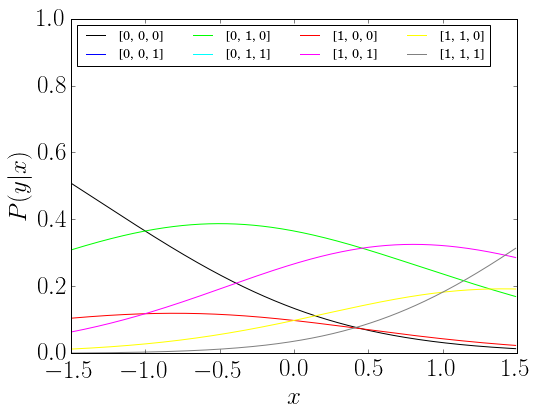

In [2]:
import ModelData
reload(ModelData)            

m = 500

# Model data
Xm, Ym = ModelData.get(m)

# Enable to show and save a chart
ModelData.plotDistribution()

# Number of classes
l = ModelData.l

## Using data

In [3]:
# Model
Xc = Xm
Yc = Ym

## Metrics

In [5]:
import MLCCV
reload(MLCCV)
import MLCLoss
reload(MLCLoss)

# Metrics for whole matrices
metrics = {"S": MLCLoss.subsetLossN}

## Array of losses for PCC

In [6]:
losses = {"S": MLCLoss.subsetLoss}
import PCC
reload(PCC)

<module 'PCC' from 'PCC.pyc'>

## Training PCC, SubsetLoss(train size)

In [116]:
#objects = [10, 20, 30, 40, 50, 60]
objects = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500]
loss = 'S'
result_train_mean = []
result_train_std = []
result_test_mean = []
result_test_std = []
for ob in objects:
    cv = cross_validation.ShuffleSplit(Xc.shape[0], n_iter=10, train_size=ob, test_size = 0.1, random_state=0)
    
    classifier = PCC.PCC(estimator = estimator, loss = losses[loss])
    
    res = MLCCV.cross_val_score_multiple_metrics(estimator = classifier, metrics = metrics,
                                cv = cv, X = Xc, Y = Yc, do_train = True)
    arr = res[loss + " train"]
    arr1 = res[loss + " test"]
    result_train_mean.append(np.mean(arr))
    result_train_std.append(np.std(arr))
    result_test_mean.append(np.mean(arr1))
    result_test_std.append(np.std(arr1))

i=0 coef=[[-0.09124547]]
i=1 coef=[[ 0.6539464  -0.88131678]]
i=2 coef=[[ 0.5647578   1.12261569 -0.66058406]]
i=0 coef=[[ 0.66261129]]
i=1 coef=[[ 0.64293454 -0.24703641]]
i=2 coef=[[ 1.08877674  0.27275116 -0.70999116]]
i=0 coef=[[-0.31200868]]
i=1 coef=[[-0.01416545 -1.14089269]]
i=2 coef=[[-0.0577745   0.96282971 -1.29296788]]
i=0 coef=[[ 0.96313741]]
i=1 coef=[[ 0.37509826 -0.97123751]]
i=2 coef=[[ 0.78603294  1.11995846 -0.83257195]]
i=0 coef=[[ 0.42947835]]
i=1 coef=[[ 0.51494823 -0.80036084]]
i=2 coef=[[ 0.21350189  0.76970122 -0.28738309]]
i=0 coef=[[ 1.16917557]]
i=1 coef=[[ 0.76212298  0.00119207]]
i=2 coef=[[ 0.96743985  0.77390282 -0.37482737]]
i=0 coef=[[ 0.97493338]]
i=1 coef=[[-0.06106715  0.56304493]]
i=2 coef=[[ 1.1094678   0.39589814 -0.52989862]]
i=0 coef=[[ 0.64334164]]
i=1 coef=[[ 0.39714342 -1.10841293]]
i=2 coef=[[ 0.39407803  0.99043796 -0.79002833]]
i=0 coef=[[ 0.39797623]]
i=1 coef=[[ 0.96783358 -0.71839205]]
i=2 coef=[[-0.07928161  1.0846392  -1.13168545]]
i

ValueError: train_size=500 should be smaller than the number of samples 500

## Showing SubsetLoss(train size)

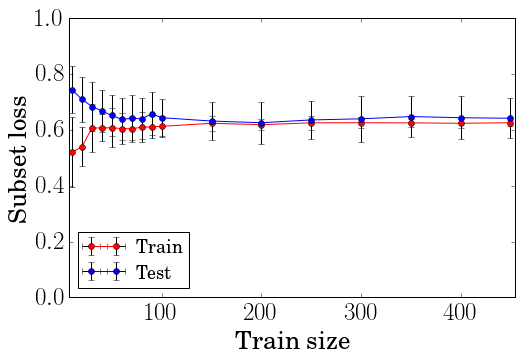

In [146]:
objects = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450]
plt.figure(figsize=(8,5))
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)

plt.errorbar(objects, result_train_mean, fmt='or-', label=r"Train",
             xerr=0, yerr=result_train_std, ecolor='black')
plt.errorbar(objects, result_test_mean, fmt='ob-', label=r"Test",
             xerr=0, yerr=result_test_std, ecolor='black')
plt.xlabel('Train size', fontsize=25)
plt.ylabel(r'Subset loss', fontsize=25)
plt.legend(loc='lower left', fontsize=18)
plt.ylim([0,1])
plt.xlim([7,455])
plt.tick_params(axis='both', which='both')
plt.savefig("ModeDataTrainSize.eps", bbox_inches = 'tight')
plt.show()

## Training PCC, SubsetLoss(regularization)

In [ ]:
loss = 'S'
result_train_mean = []
result_train_std = []
result_test_mean = []
result_test_std = []
#for ob in objects:
#,
C = [0.1, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 5.0, 7.0, 10.0, 15.0, 20.0, 50.0]
cv = cross_validation.ShuffleSplit(Xc.shape[0], n_iter=10, train_size=200, test_size = 0.1, random_state=0)
for reg in C:
    estimator = LR(class_weight = 'balanced', fit_intercept = True, solver='liblinear', n_jobs=2, penalty='l2', C = reg)
    
    classifier = PCC.PCC(estimator = estimator, loss = losses[loss])
    
    res = MLCCV.cross_val_score_multiple_metrics(estimator = classifier, metrics = metrics,
                                cv = cv, X = Xc, Y = Yc, do_train = True)
    arr = res[loss + " train"]
    arr1 = res[loss + " test"]
    result_train_mean.append(np.mean(arr))
    result_train_std.append(np.std(arr))
    result_test_mean.append(np.mean(arr1))
    result_test_std.append(np.std(arr1))

i=0 coef=[[ 0.57483982]]
i=1 coef=[[ 0.43145641 -0.88644681]]
i=2 coef=[[ 0.49407539  1.27507805 -1.01524029]]
i=0 coef=[[ 0.52239467]]
i=1 coef=[[ 0.70284917 -0.68284965]]
i=2 coef=[[ 0.49440497  1.27553037 -0.86101698]]
i=0 coef=[[ 0.74205527]]
i=1 coef=[[ 0.522953   -0.98872353]]
i=2 coef=[[ 0.5995741   1.15686012 -0.96227531]]
i=0 coef=[[ 0.6617606]]
i=1 coef=[[ 0.48613577 -0.82914663]]
i=2 coef=[[ 0.58501025  1.23927456 -1.07960592]]
i=0 coef=[[ 0.72839587]]
i=1 coef=[[ 0.42823513 -0.8560801 ]]
i=2 coef=[[ 0.50716061  1.26039696 -0.9925435 ]]
i=0 coef=[[ 0.71480554]]
i=1 coef=[[ 0.54346815 -0.87196183]]
i=2 coef=[[ 0.48550886  1.23552511 -0.94949829]]
i=0 coef=[[ 0.61543252]]
i=1 coef=[[ 0.49029744 -0.76644904]]
i=2 coef=[[ 0.5572502   1.35234871 -0.83640899]]
i=0 coef=[[ 0.51147754]]
i=1 coef=[[ 0.64211793 -0.88752022]]
i=2 coef=[[ 0.54175795  1.24235477 -0.88595727]]
i=0 coef=[[ 0.67167856]]
i=1 coef=[[ 0.64706796 -0.77161169]]
i=2 coef=[[ 0.66614993  1.32726209 -1.04729217]]
i=

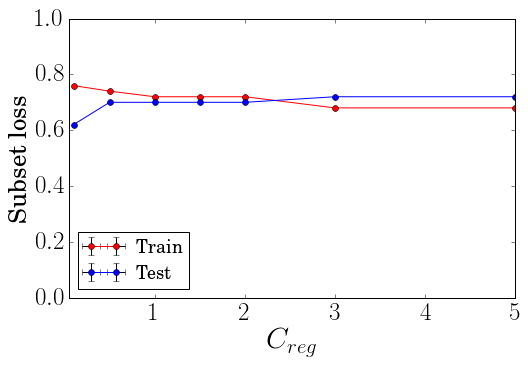

In [25]:
plt.figure(figsize=(8,5))
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
params = {'text.usetex' : True,
       'font.size' : 25,
#          'font.family' : 'lmodern',
       'text.latex.unicode': True}
plt.rcParams.update(params)

plt.errorbar(C, result_train_mean, fmt='or-', label=r"Train",
             xerr=0, yerr=result_train_std, ecolor='black')
plt.errorbar(C, result_test_mean, fmt='ob-', label=r"Test",
             xerr=0, yerr=result_test_std, ecolor='black')
plt.xlabel('$C_{reg}$', fontsize=30)
plt.ylabel(r'Subset loss', fontsize=25)
plt.legend(loc='lower left', fontsize=18)
plt.ylim([0,1])
plt.xlim([0.05,5])
plt.tick_params(axis='both', which='both')
plt.savefig("ModeDataReg.eps", bbox_inches = 'tight')
plt.show()